# Problem Statement

The dataset can be downloaded from here. It contains only 2 columns, one column is Date and the other column relates to the consumption percentage.

It shows the consumption of electricity from 1985 till 2018. The goal is to predict electricity consumption for the next 6 years i.e. till 2024.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('fivethirtyeight') # special style template for matplotlib, highly useful for visualizing time series data
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7


In [3]:
df=pd.read_csv('Electric_Production.csv')

In [4]:
df

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151
...,...,...
392,09-01-2017,98.6154
393,10-01-2017,93.6137
394,11-01-2017,97.3359
395,12-01-2017,114.7212


Now, Define column names, drop nulls, convert Date to DateTime format and make Date as an index column because it is not possible to plot the graph without index.

In [5]:
df.columns=['Date', 'Consumption']
df=df.dropna()
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True) #set date as index
df

,Consumption
Date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


In [6]:
df.tail()

,Consumption
Date,
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359
2017-12-01,114.7212
2018-01-01,129.4048


In [7]:
df.shape

(397, 1)

In [8]:
df.describe()

,Consumption
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


in 2018 we have only 1 month of consumption so that we drop that row

In [46]:
df.drop(pd.Timestamp('2018-01-01'))

,Consumption
Date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-08-01,108.9312
2017-09-01,98.6154
2017-10-01,93.6137


just plot 12 months per years in heatmap. plot give you clear decribtion of which year and months are high consumption occur.

In [47]:
#compare each year over 12 months
heatmap_data = df.copy()

# First we need to add weekdays as a column
heatmap_data['Month'] = df.index.month_name()

# Next we add the year as column and group the data up to annual day of week level
heatmap_data['Year'] =  heatmap_data.index.year
heatmap_data = heatmap_data.groupby(['Year', 'Month']).sum()

# Reset index
heatmap_data = heatmap_data.reset_index()

# Pivot it to a uniform data format for heatmaps
heatmap_data = heatmap_data.pivot(index='Year', columns='Month', values='Consumption')

# Reorder columns
heatmap_data = heatmap_data[['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']]

heatmap_data.head(15)

Month,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
1985,72.5052,70.6720,62.4502,57.4714,55.3151,58.0904,62.6202,63.2485,60.5846,56.3154,58.0005,68.7145
1986,73.3057,67.9869,62.2221,57.0329,55.8137,59.9005,65.7655,64.4816,61.0005,57.5322,59.3417,68.1354
1987,73.8152,70.0620,65.6100,60.1586,58.8734,63.8918,68.8694,70.0669,64.1151,60.3789,62.4643,70.5777
1988,79.8703,76.1622,70.2928,63.2384,61.4065,67.1097,72.9816,75.7655,67.5152,63.2832,65.1078,73.8631
1989,77.9188,76.6822,73.3523,65.1081,63.6892,68.4722,74.0301,75.0448,69.3053,65.8735,69.0706,84.1949
1990,84.3598,77.1726,73.1964,67.2781,65.8218,71.4654,76.6140,77.1052,73.0610,67.4365,68.5665,77.6839
1991,86.0214,77.5573,73.3650,67.1500,68.8162,74.8448,80.0928,79.1606,73.5743,68.7538,72.5166,79.4894
1992,85.2855,80.1643,74.5275,69.6441,67.1784,71.2078,77.5081,76.5374,72.3541,69.0286,73.4992,84.5159
1993,87.9464,84.5561,79.4747,71.0578,67.6762,74.3297,82.1048,82.0605,74.6031,69.6810,74.4292,84.2284


Text(0.5, 1.0, 'Heatmap - by Day of Month')

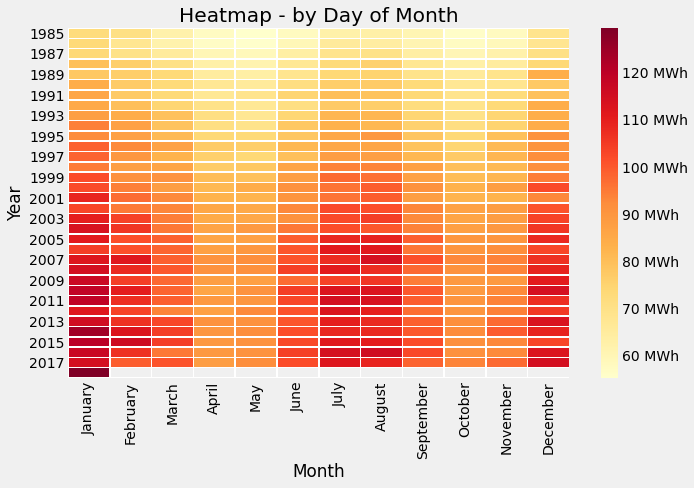

In [48]:
sns.heatmap(heatmap_data, linewidths=.5, cmap='YlOrRd',
            cbar=True, cbar_kws={"format": '%1.0f MWh'}).set_title('Heatmap - by Day of Month')

In [49]:
# Create new dataset for heatmap
heatmap_data = df.copy()
# First we need to add weekdays as a column
heatmap_data['Weekday_Name'] = df.index.day_name()

# Next we add the year as column and group the data up to annual day of week level
heatmap_data['Year'] =  heatmap_data.index.year
heatmap_data = heatmap_data.groupby(['Year', 'Weekday_Name']).sum()

# Reset index 
heatmap_data = heatmap_data.reset_index()

# Pivot it to a uniform data format for heatmaps
heatmap_data = heatmap_data.pivot(index='Year', columns='Weekday_Name', values='Consumption')

# Reorder columns
heatmap_data = heatmap_data[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

heatmap_data.head()

Weekday_Name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Year,,,,,,,
1985,120.0916,128.8206,55.3151,63.2485,191.1227,58.0904,129.2991
1986,129.1359,122.7984,130.8379,55.8137,64.4816,189.5507,59.9005
1987,63.8918,134.6928,129.0280,134.1941,58.8734,70.0669,198.1363
1988,151.9277,135.4006,67.1097,141.3783,216.0903,63.2832,61.4065
1989,63.6892,75.0448,219.1051,68.4722,153.5002,139.1382,143.7923


Text(0.5, 1.0, 'Heatmap - by Day of Week')

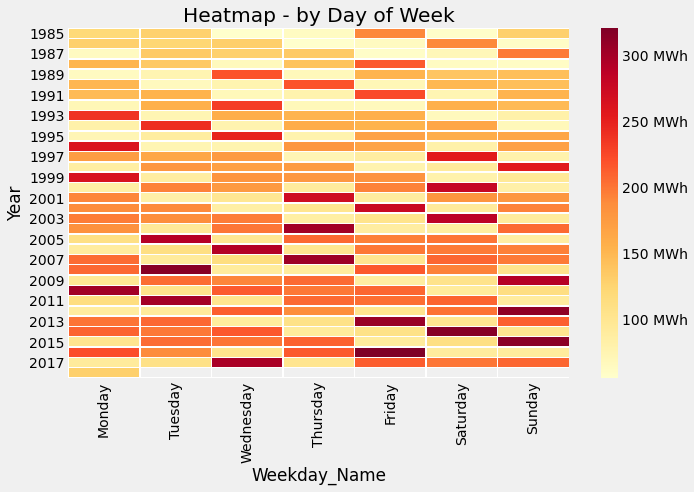

In [90]:
# Visualise consumption in days
sns.heatmap(heatmap_data, linewidths=.5, cmap='YlOrRd',
            cbar=True, cbar_kws={"format": '%1.0f MWh'}).set_title('Heatmap - by Day of Week')

1.Visualizing the time series.

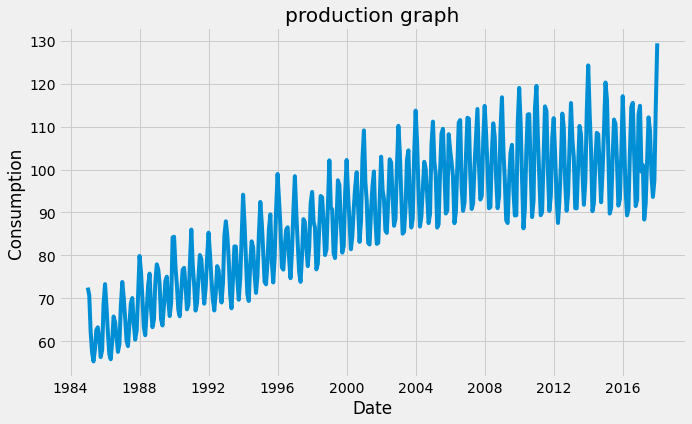

In [50]:
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.title("production graph")
plt.plot(df)

Hence, we have identified that our series is not stationary. We need to have a stationary series to do time series forecasting. In the next stage, we will try to convert this into a stationary series.

Lets us plot the scatterplot:

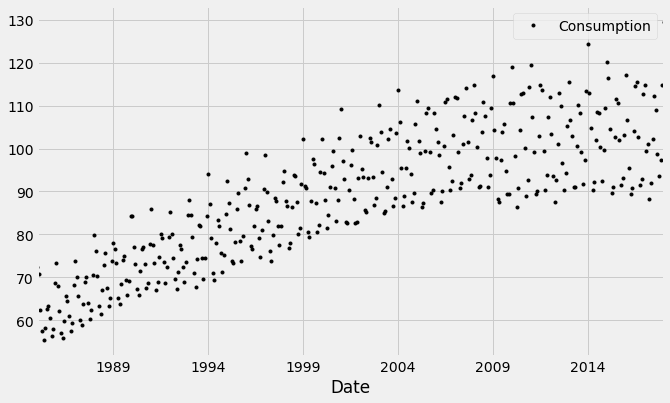

In [51]:
df.plot(style='k.')
plt.show()

We can also visualize the data in our series through a distribution too.

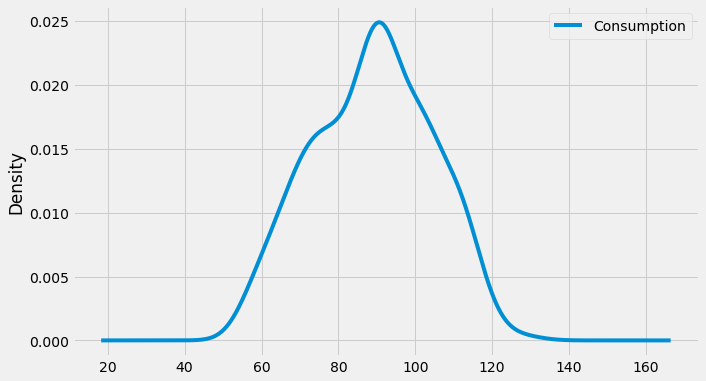

In [53]:
df.plot(kind='kde')

We can observe a near-normal distribution(bell-curve) over consumption values.

These components are defined as follows:

Level: The average value in the series.

Trend: The increasing or decreasing value in the series.

Seasonality: The repeating short-term cycle in the series.

Noise: The random variation in the series.

separate Trend and Seasonality from the time series.

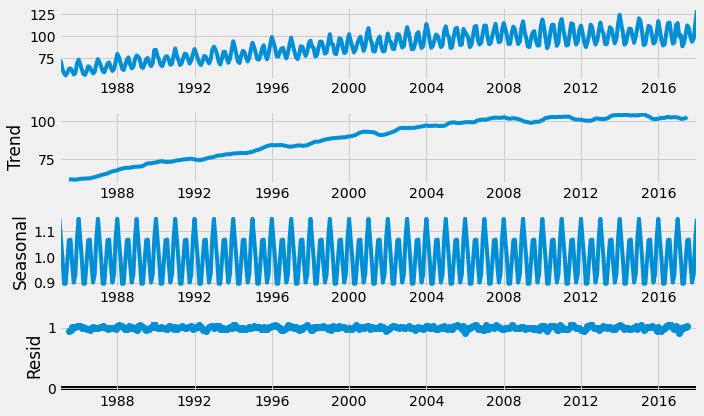

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df, model='multiplicative')
result.plot()
plt.show()

There is an upward trend and a recurring event where electricity consumption shoots maximum every year.

2. Stationarising the time series.

First, we need to check if a series is stationary or not.

ADF (Augmented Dickey-Fuller) Test

The Dickey-Fuller test is one of the most popular statistical tests. It can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not. The null and alternate hypothesis of this test is:

Null Hypothesis: The series has a unit root (value of a =1)

Alternate Hypothesis: The series has no unit root.

If we fail to reject the null hypothesis, we can say that the series is non-stationary. This means that the series can be linear or difference stationary (we will understand more about difference stationary in the next section).

If both mean and standard deviation are flat lines(constant mean and constant variance), the series becomes stationary.

The following function is one that can plot a series with its rolling mean and standard deviation.

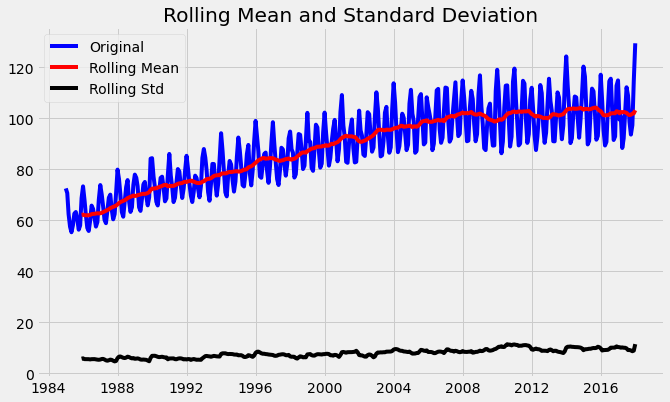

Results of dickey fuller test
Test Statistics                 -2.256990
p-value                          0.186215
No. of lags used                15.000000
Number of observations used    381.000000
critical value (1%)             -3.447631
critical value (5%)             -2.869156
critical value (10%)            -2.570827
dtype: float64


In [55]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

    #perform dickey fuller test  
    print("Results of dickey fuller test")
    adft = adfuller(timeseries['Consumption'],autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

test_stationarity(df)

we can see the increasing mean and standard deviation and hence our series is not stationary.

We see that the p-value is greater than 0.05 so we cannot reject the Null hypothesis. Also, the test statistics is greater than the critical values. so the data is non-stationary.

To get a stationary series, we need to eliminate the trend and seasonality from the series.

We start by taking a log of the series to reduce the magnitude of the values and reduce the rising trend in the series.

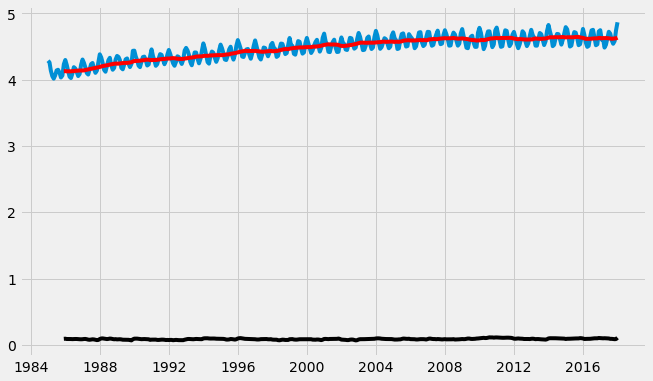

In [56]:
df_log = np.log(df)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()#Taking input for the past 12 months in the rolling average
plt.plot(df_log)
plt.plot(moving_avg, color="red")
plt.plot(std_dev, color ="black")
plt.show()


In [57]:
type(df_log)

pandas.core.frame.DataFrame

In [76]:
df_log

,Consumption
Date,
1985-01-01,4.283658
1985-02-01,4.258049
1985-03-01,4.134369
1985-04-01,4.051287
1985-05-01,4.013046
...,...
2017-09-01,4.591227
2017-10-01,4.539177
2017-11-01,4.578168


This way, we eliminate trends out of a series and obtain a more stationary series.

In [58]:
df_log_moving_avg_diff = df_log-moving_avg
df_log_moving_avg_diff.dropna(inplace=True)

In [77]:
df_log_moving_avg_diff

,Consumption
Date,
1985-12-01,0.103961
1986-01-01,0.167724
1986-02-01,0.095629
1986-03-01,0.007329
1986-04-01,-0.079115
...,...
2017-09-01,-0.022477
2017-10-01,-0.076443
2017-11-01,-0.041347


Perform the Dickey-Fuller test (ADFT) once again

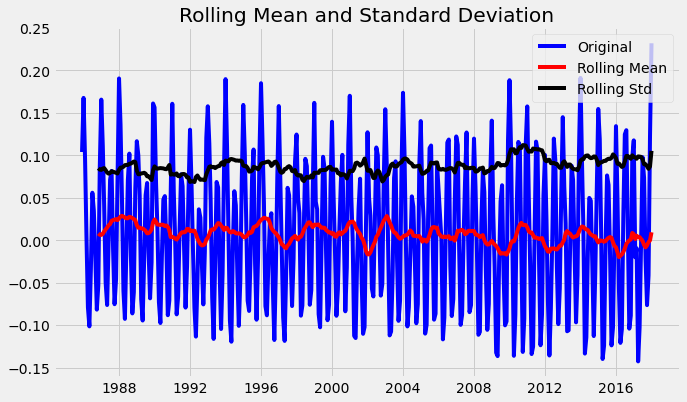

Results of dickey fuller test
Test Statistics                 -5.211586
p-value                          0.000008
No. of lags used                15.000000
Number of observations used    370.000000
critical value (1%)             -3.448148
critical value (5%)             -2.869383
critical value (10%)            -2.570948
dtype: float64


In [59]:
test_stationarity(df_log_moving_avg_diff)

One of the modules is completed as we came to a conclusion. We need to check the weighted average, to understand the trend of the data in time series. Take the previous log data and to perform the following operation.

In [60]:
weighted_average = df_log.ewm(halflife=12, min_periods=0,adjust=True).mean()

The exponential moving average (EMA) is a weighted average of the last n prices, where the weighting decreases exponentially with each previous price/period. In other words, the formula gives recent prices more weight than past prices.

No handles with labels found to put in legend.


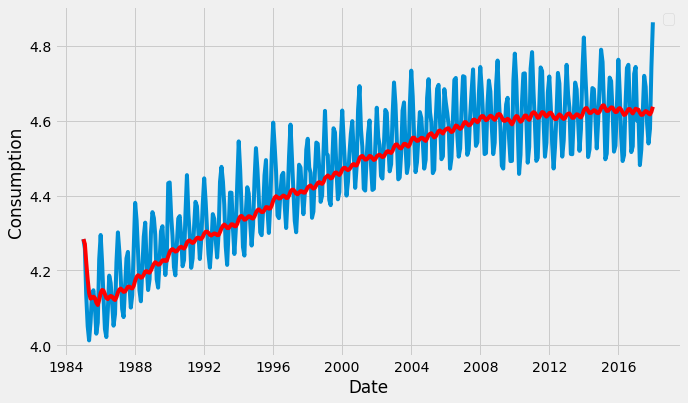

In [61]:
plt.plot(df_log)
plt.plot(weighted_average, color='red')
plt.xlabel("Date")
plt.ylabel("Consumption")
from pylab import rcParams
rcParams['figure.figsize'] = 10,6
plt.legend()
plt.show(block =False)


now take the same df_log and subtract with weighted_average and perform the Dickey-Fuller test (ADFT) once again.

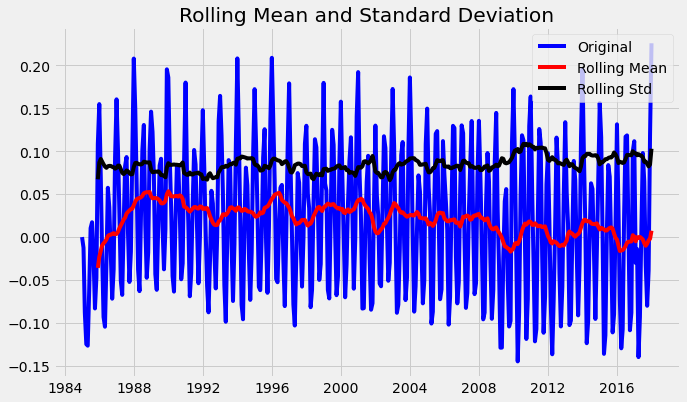

Results of dickey fuller test
Test Statistics                 -3.251531
p-value                          0.017189
No. of lags used                15.000000
Number of observations used    381.000000
critical value (1%)             -3.447631
critical value (5%)             -2.869156
critical value (10%)            -2.570827
dtype: float64


In [62]:
logScale_weightedMean = df_log-weighted_average
from pylab import rcParams
rcParams['figure.figsize'] = 10,6
test_stationarity(logScale_weightedMean)

From the above graph, we observed that the data attained stationarity. We also see that the test statistics and critical value is relatively equal.

There can be cases when there is a high seasonality in the data. In those cases, just removing the trend will not help much. We need to also take care of the seasonality in the series. One such method for this task is differencing.

Differencing is a method of transforming a time series dataset. It can be used to remove the series dependence on time, so-called temporal dependence. This includes structures like trends and seasonality. Differencing can help stabilize the mean of the time series by removing changes in the level of a time series, and so eliminating (or reducing) trend and seasonality.

Differencing is performed by subtracting the previous observation from the current observation.

Perform the Dickey-Fuller test (ADFT) once again.

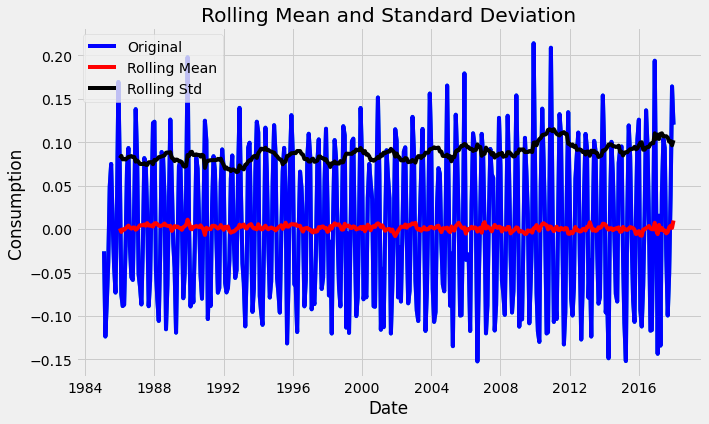

Results of dickey fuller test
Test Statistics               -6.748333e+00
p-value                        2.995161e-09
No. of lags used               1.400000e+01
Number of observations used    3.810000e+02
critical value (1%)           -3.447631e+00
critical value (5%)           -2.869156e+00
critical value (10%)          -2.570827e+00
dtype: float64


In [63]:
df_log_diff = df_log - df_log.shift()
plt.title("Shifted timeseries")
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.plot(df_log_diff)

#Let us test the stationarity of our resultant series
df_log_diff.dropna(inplace=True)
test_stationarity(df_log_diff)

In [78]:
df_log_diff

,Consumption
Date,
1985-02-01,-0.025609
1985-03-01,-0.123680
1985-04-01,-0.083082
1985-05-01,-0.038242
1985-06-01,0.048954
...,...
2017-09-01,-0.099489
2017-10-01,-0.052051
2017-11-01,0.038991


In [64]:
!pip install chart_studio

You should consider upgrading via the 'c:\users\asus\appdata\local\programs\python\python36\python.exe -m pip install --upgrade pip' command.


c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until


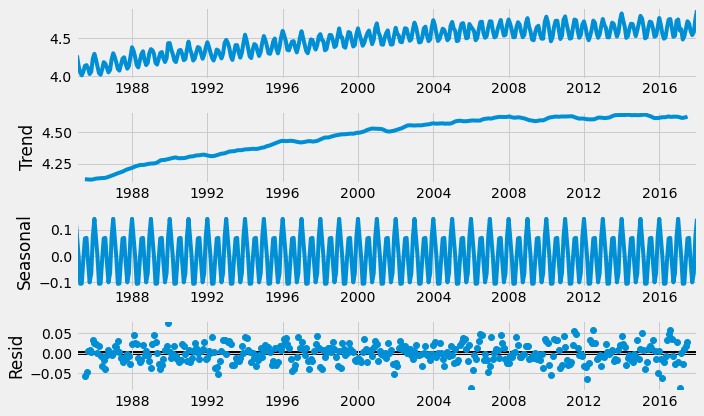

In [65]:
from chart_studio.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_log, model='additive', freq = 12)
result.plot()
plt.show()

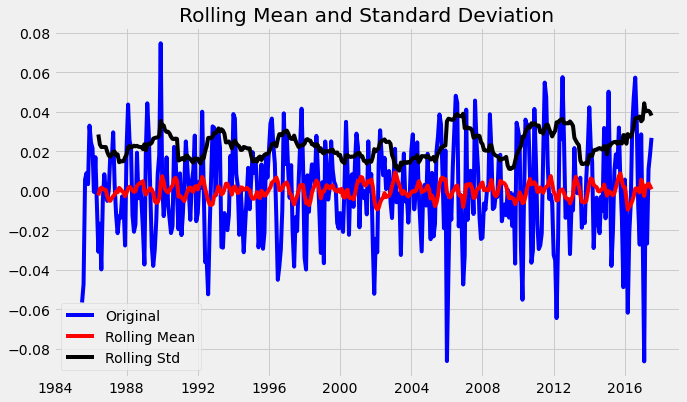

In [66]:
#perform the Dickey-Fuller test (ADFT) once again.
def test_stationarity_final(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)



trend = result.trend
trend.dropna(inplace=True)
seasonality = result.seasonal
seasonality.dropna(inplace=True)
residual = result.resid
residual.dropna(inplace=True)
test_stationarity_final(residual)


After the decomposition, if we look at the residual then we have clearly a flat line for both mean and standard deviation. We have got our stationary series and now we can move to find the best parameters for our model.

Determine optimal parameters for our model we need ACF and PACF plots.

ARIMA model is classified as an ARIMA(p,d,q) model, where:

p → Number of autoregressive terms

d → Number of nonseasonal differences needed for stationarity

q → Number of lagged forecast errors in the prediction equation.

Autocorrelation Function(ACF)

Statistical correlation summarizes the strength of the relationship between two variables. Pearson’s correlation coefficient is a number between -1 and 1 that describes a negative or positive correlation respectively. A value of zero indicates no correlation.

We can calculate the correlation for time series observations with previous time steps, called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an autocorrelation.

A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function, or the acronym ACF. This plot is sometimes called a correlogram or an autocorrelation plot.

Partial Autocorrelation Function(PACF)

A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.

The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.

The autocorrelation for observation and observation at a prior time step is comprised of both the direct correlation and indirect correlations. It is these indirect correlations that the partial autocorrelation function seeks to remove.

In [70]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

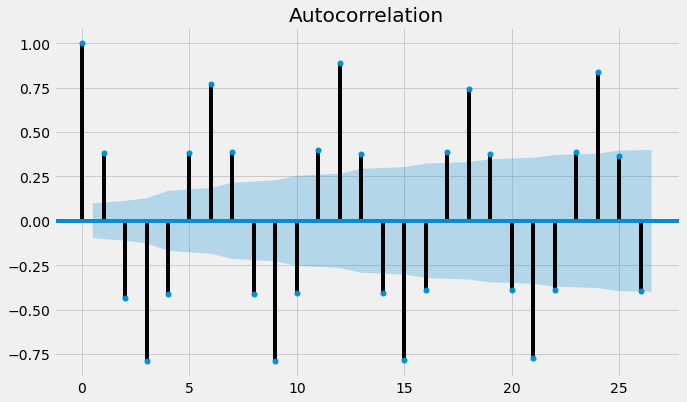

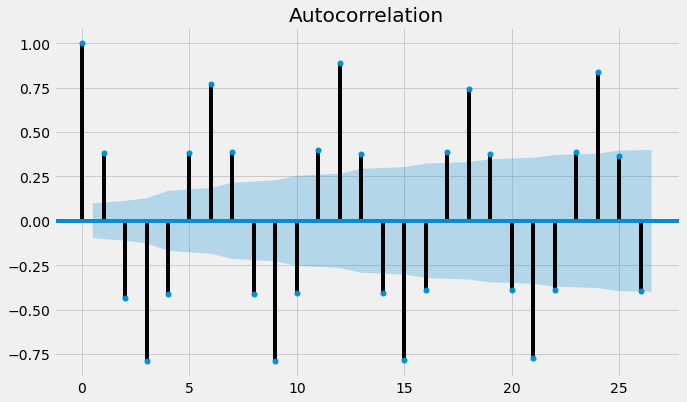

In [82]:
#plot_acf is to indentify parameter q
plot_acf(df_log_diff)

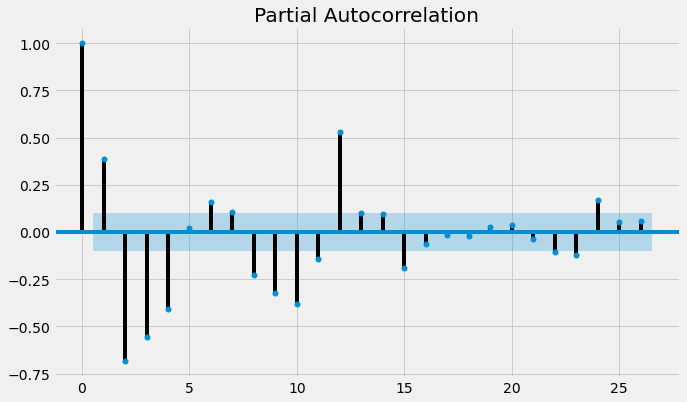

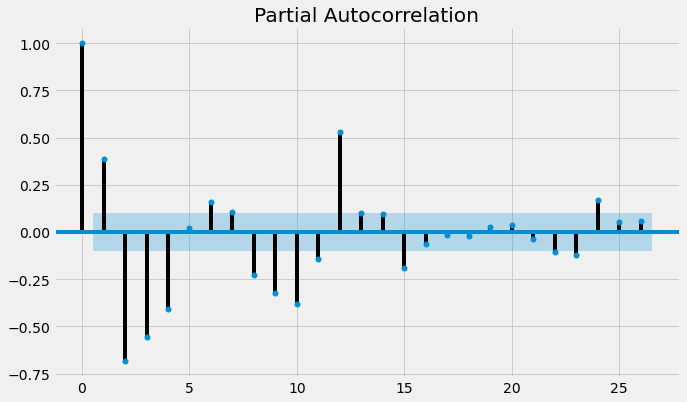

In [83]:
#to identify the value of p
plot_pacf(df_log_diff)

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\stattools.py:669: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


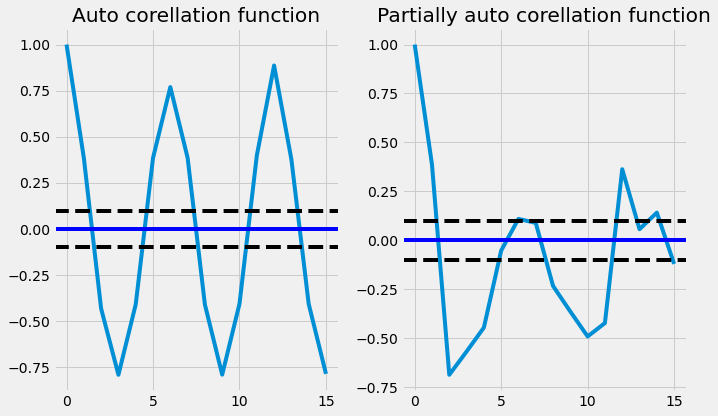

In [85]:
#another method to plot ACF and PACF and find parameter q & p
from statsmodels.tsa.stattools import acf,pacf
# we use d value here(data_log_shift)
acf = acf(df_log_diff, nlags=15)
pacf= pacf(df_log_diff, nlags=15,method='ols')#plot PACF
plt.subplot(121)
plt.plot(acf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.title('Auto corellation function')
plt.tight_layout()#plot ACF
plt.subplot(122)
plt.plot(pacf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.title('Partially auto corellation function')
plt.tight_layout()

In order to find the p and q values from the above graphs, we need to check, where the graph cuts off the origin or drops to zero for the first time from the above graphs the p and q values are merely close to 3 where the graph cuts off the origin ( draw the line to x-axis) now we have p,d,q values. So now we can substitute in the ARIMA model and let's see the output.

In [86]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_log, order=(3,1,3))
result_AR = model.fit(disp = 0)

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequen

Note that, these models will give a value of RSS. Lower RSS values indicate a better model.

RSS : 0.522784


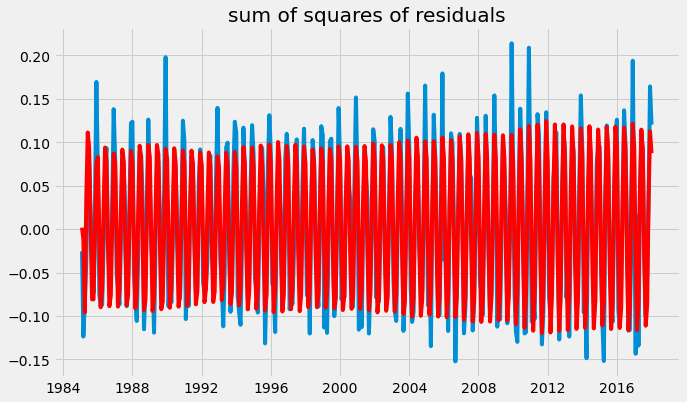

In [87]:
plt.plot(df_log_diff)
plt.plot(result_AR.fittedvalues, color='red')
plt.title("sum of squares of residuals")
print('RSS : %f' %sum((result_AR.fittedvalues-df_log_diff["Consumption"])**2))

Less the RSS value, the more effective the model is. You check with (2,1,0),(3,1,1), etc to look for the smallest values of RSS.

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


RSS : 1.273784


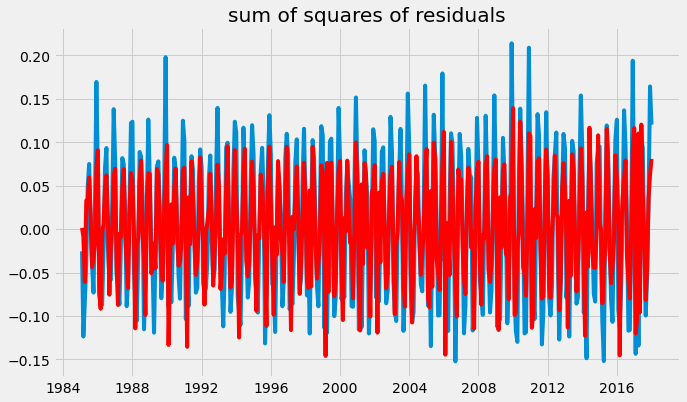

In [94]:
model1 = ARIMA(df_log, order=(2,1,0))
result_AR1 = model1.fit(disp = 0)
plt.plot(df_log_diff)
plt.plot(result_AR1.fittedvalues, color='red')
plt.title("sum of squares of residuals")
print('RSS : %f' %sum((result_AR1.fittedvalues-df_log_diff["Consumption"])**2))

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


RSS : 0.720743


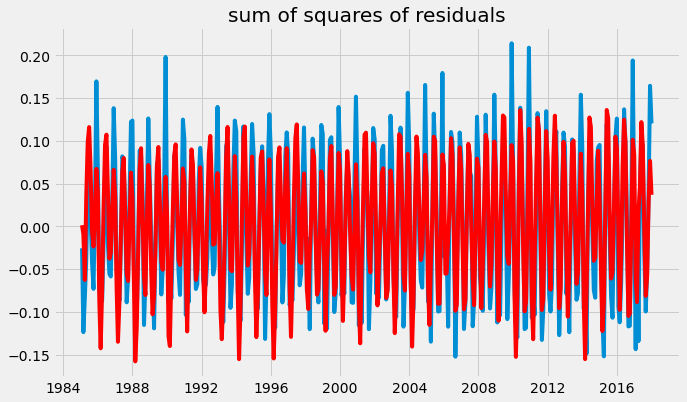

In [95]:
model2 = ARIMA(df_log, order=(3,1,1))
result_AR2 = model2.fit(disp = 0)
plt.plot(df_log_diff)
plt.plot(result_AR2.fittedvalues, color='red')
plt.title("sum of squares of residuals")
print('RSS : %f' %sum((result_AR2.fittedvalues-df_log_diff["Consumption"])**2))

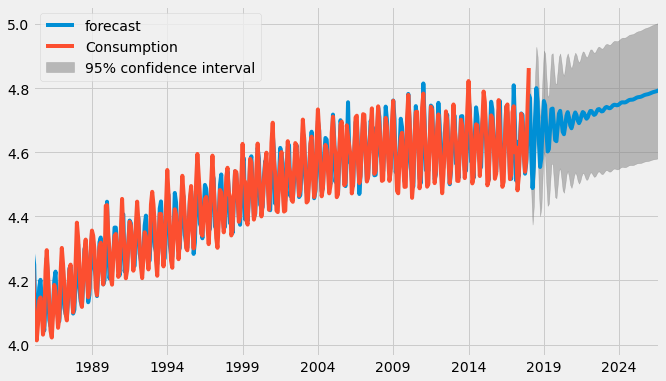

In [99]:
result_AR.plot_predict(1,500)
x=result_AR.forecast(steps=300)

From the above graph, we calculated the future predictions till 2024 the greyed out area is the confidence interval that means the predictions will not cross that area.